# K Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

### Using make blobs to create an artificial data set

In [3]:
blob = make_blobs()

In [4]:
data = blob[0]
target = blob[1]

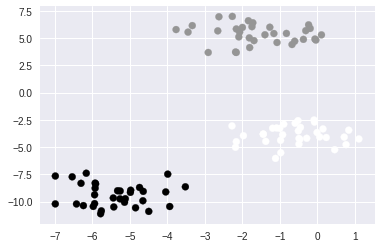

In [5]:
# plt.boxplot(data[:,0], target,c='r')
plt.scatter(data[:,1], data[:,0], c=target)

### Using the iris classification data set from sklearn for an example classification

In [6]:
iris = load_iris()

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [9]:
species = list(iris.target_names)

columns = ['sepel_length', 'sepel_width', 'petal_length', 'petal_width']

In [10]:
iris_data = pd.DataFrame(iris.data, columns=columns)
iris_target = pd.DataFrame(iris.target)

In [11]:
# combining the data and target into one dataset for graphing
graph_data = pd.DataFrame(iris.data, columns=columns)
graph_data['species'] = pd.DataFrame(iris.target)

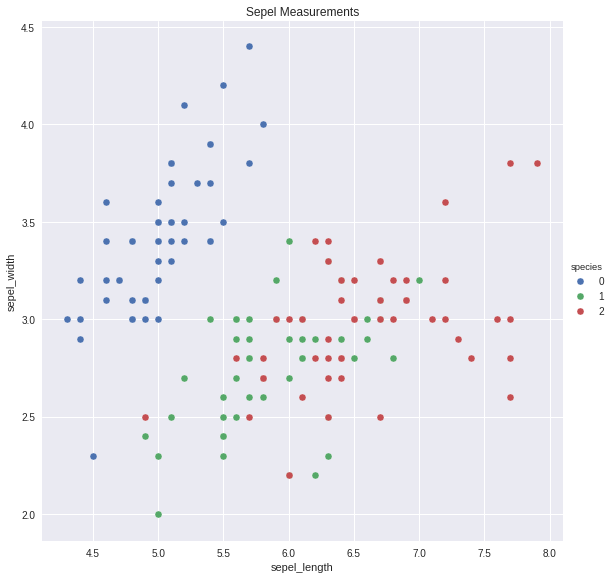

In [12]:
sns.pairplot(x_vars=['sepel_length'], y_vars=['sepel_width'], data=graph_data, hue='species', size=8, )
plt.title('Sepel Measurements')

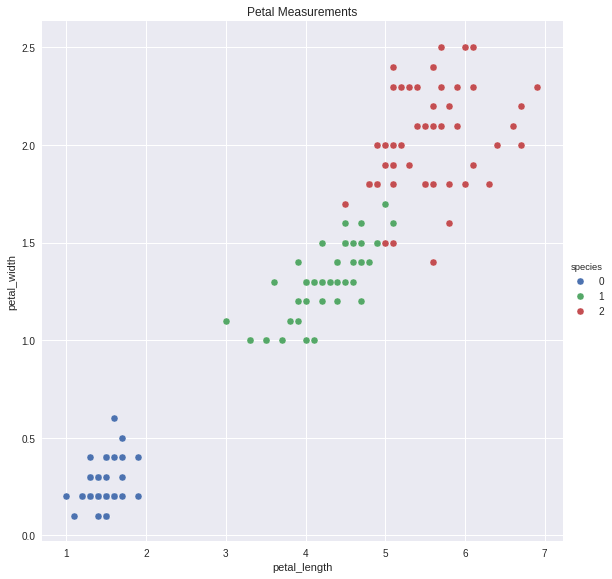

In [13]:
sns.pairplot(x_vars=['petal_length'], y_vars=['petal_width'], data=graph_data, hue='species', size=8)
plt.title('Petal Measurements')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
iris_data = np.array(iris_data)
iris_target = np.array(iris_target)

In [16]:
X_tr, X_ts, y_tr, y_ts = train_test_split(iris_data, iris_target, test_size=.5)

In [17]:
def d1(X):
    
    d_list = []
    
    for i in range(X.shape[0]):
        x_diff = (X_tr - X[i])**2
        distance = [np.sqrt(x) for x in x_diff]
        d_list.append(distance)
        
    return np.array(d_list)


In [18]:
def distance(X):
    v_dist = [((X_tr - X[i])**2) for i in range(X.shape[0])]
    distance = [[np.sqrt(x.sum()) for x in X] for X in v_dist]
    
    return np.array(distance)

def prediction(distance):
    
    min_dist_index = [distance[i].argsort()[0:6] for i in range(distance.shape[0])]
    dist_index_array = np.array(min_dist_index)
    nbr_trg = [y_tr[dist_index_array[i]] for i in range(dist_index_array.shape[0])]
    nbr_trg_array = np.array(nbr_trg)
    
    pred =[]
    for i in range(nbr_trg_array.shape[0]):
        trg_freq, trg_id = np.unique(nbr_trg[i], return_counts=True)
        pred_index = trg_freq.argsort()[0]
        pred.append(trg_freq[pred_index])

    
    return pred
    

def score(predictions):
    
    correct = 0
    incorrect = 0
    
    for actual, pred in zip(y_ts, predictions):
        if actual == pred:
            correct +=1
        else:
            incorrect += 1
    
    print(correct,incorrect)
    return (correct / (correct + incorrect)) * 100
            


In [19]:
dist = distance(X_ts)
p = prediction(dist)
s = score(p)


71 4


In [20]:
s

94.66666666666667

In [21]:
from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()

In [22]:
y = y_ts.ravel()

In [23]:
type(y), type(y_ts)

(numpy.ndarray, numpy.ndarray)

In [26]:
y_y = pd.DataFrame(y_ts)

In [24]:
y.shape, y_ts.shape

((75,), (75, 1))

In [31]:
y


array([2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0,
       1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0,
       1, 1, 1, 1, 0, 2])

In [27]:
KNC.fit(X_tr, y_tr)
KNC.score(X_ts, y_y)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


0.97333333333333338

In [ ]:
KNC.fit(X_tr, y_tr)
KNC.score(X_ts, y)

In [ ]:
class KNN(object):
    
    def __init__(self):
        pass
    
    def fit(X, y):
        
        self.X_fit = np.array(X_fit)
        self.y_Fit = np.array(y_fit)
        
        return self.X, self.y
    
    def predict(self, X, neighbors=1):
        
        if X.shape[0] <= neighbors:
            print('Number of nearest neighbors must be less than the number of observations for the dataset.')
        else:
            pass
    
        for i in range(X.shape[0]):
            dist = np.sqrt((self.X_fit[i][0] - X[:,0])**2 + (self.X_fit[i][1] - X[:,1])**2 )
        
        min_dist_index = dist.argsort()[0:neighbors]
        trgt_of_nbr = y_ts[min_dist_index]
    
        trgt_freq, trgt_id = np.unique(trgt_of_nbr, return_counts=True)
        pred_index = trgt_freq.argsort()[0]
        prediction = trgt_freq[pred_index]
        
        return 
    
    
# front end back end with flask

def predict(X, neighbors=1):
    
    pred_list = []
    # add exception for when neighbors > len(X)
    for i in range(len(y_ts))
        dist = np.sqrt((X_tr[i][0] - X[:,0])**2 + (X_tr[i][1] - X[:,1])**2 )
        min_dist_index = dist.argsort()[0:neighbors]
        trgt_of_nbr = y_ts[min_dist_index]
    
    
        trgt_freq, trgt_id = np.unique(trgt_of_nbr, return_counts=True)
        pred_index = trgt_freq.argsort()[0]
        prediction = trgt_freq[pred_index]
        
        pred_list.append
        
    return pred_list
    
 # TO DO

* data type handling


### Linear Regression
* investigate result difference with sklearn.


### K Nearest Neighbors
* Add function that solves class prediction ties.
  * weights

### Logistic Regression
* Needs additional scoring methods
  * ROC/AUC


In [ ]:
test

In [ ]:
def test(X, neighbors=1):
    
    # add exception for when neighbors > len(X)
    for i in range(X_tr.shape[0]):
        dist = np.sqrt((X_tr[i][0] - X[:,0])**2 + (X_tr[i][1] - X[:,1])**2 )
        
    min_dist_index = dist.argsort()[0:neighbors]
    trgt_of_nbr = y_ts[min_dist_index]
    
    
    trgt_freq, trgt_id = np.unique(trgt_of_nbr, return_counts=True)
    pred_index = trgt_freq.argsort()[0]
    prediction = trgt_freq[pred_index]
    
#q
#     trgt_ind = dist.argsort(trgt_freq)[0:2]
    
#     if trgt_freq[0] == trgt_freq[2]:
    
    
    
    return dist

In [ ]:
d = predict(X_ts, neighbors=5)
d,y_ts

In [ ]:
a, b = predict(X_ts, neighbors=5)

In [ ]:
a,b

In [ ]:
a = np.array([1,2,3,4,5])

In [ ]:
freq, i_d = predict(X_ts, neighbors=5)
freq,i_d

In [ ]:
zz = d.argsort()[0:2]

In [ ]:
zz

In [ ]:
a,b = np.unique(p, return_counts=True)
ab = np.column_stack((b,a))



In [ ]:
d = predict(X_ts)

In [ ]:
# TO DO
* train test split
* data type handling



### Linear Regression
* investigate result difference with sklearn.


### K Nearest Neighbors
* Add function that solves class prediction ties.
  * weights

### Logistic Regression
* Needs additional scoring methods
  * ROC/AUC

  
    Class Model():
   
       def fit(X,y):
        
            '''
            fits a model
            '''
            
            pass
        
        
        def predict(X,y):
        
            '''
            predict
            '''
            
            pass
            
        def probabililty_prediction(X,y):
            
            '''
            give probabilites for prediciton
            '''
            
            pass
        
        def score():
        
            '''
            scores model.
            '''